#### Table of Contents
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1.-Features-Description" role="tab" aria-controls="profile">1. Features Description</a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2.-Importing-Packages-/-Libraries" role="tab" aria-controls="messages">2. Importing Packages / Libraries</a>
    
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3.-Loading-the-Dataset" role="tab" aria-controls="settings">3. Loading the Dataset</a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4.-Data-Cleaning" role="tab" aria-controls="settings">4. Data Cleaning</a> 
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5.-Model-Building" role="tab" aria-controls="settings">5. Model Building</a>
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6.Conclusion:" role="tab" aria-controls="settings">6. Conclusion</a>


## Introduction

<font size=3>
The dataset comprises several features related to individuals' health parameters and diagnostic indicators, with the ultimate goal of predicting the presence of heart disease (the target variable). Each row represents a patient, while the columns contain various attributes such as age, gender, chest pain type, blood pressure at rest, cholesterol level, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved during exercise, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, the number of major vessels (0-3) colored by fluoroscopy, and a diagnostic category related to thalassemia. These features provide valuable insights into potential risk factors and diagnostic markers associated with heart disease. The task involves analyzing this dataset, exploring the relationships between the features and the target variable, and ultimately building a predictive model to aid in diagnosing heart disease based on patient characteristics.
</font>


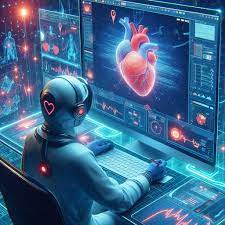

<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
    animation: fadeIn 1s;
  }
  
  th {
    background-color: #f2f2f2;
    padding: 8px;
    text-align: center;
    border-bottom: 1px solid #ddd;
  }
  
  td {
    padding: 8px;
    border-bottom: 1px solid #ddd;
  }
  
  @keyframes fadeIn {
    from { opacity: 0; }
    to { opacity: 1; }
  }
</style>

<h3 style="text-align: center;">Heart Disease Dataset Features Description</h3>

<table>
  <colgroup>
    <col span="1" style="width: 20%;">
    <col span="1" style="width: 20%;">
    <col span="1" style="width: 60%;">
  </colgroup>
  <tr>
    <th>Feature Name</th>
    <th>Variable Type</th>
    <th>Variable Description</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>Numeric</td>
    <td>Age of the individual</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Nominal</td>
    <td>Gender of the individual</td>
  </tr>
  <tr>
    <td>Chest Pain</td>
    <td>Nominal</td>
    <td>Type of chest pain experienced</td>
  </tr>
  <tr>
    <td>Resting Blood Pressure</td>
    <td>Numeric</td>
    <td>Blood pressure at rest (mm Hg)</td>
  </tr>
  <tr>
    <td>Cholesterol</td>
    <td>Numeric</td>
    <td>Cholesterol level (mg/dl)</td>
  </tr>
  <tr>
    <td>Fasting Blood Sugar</td>
    <td>Nominal</td>
    <td>Fasting blood sugar > 120 mg/dl (True/False)</td>
  </tr>
  <tr>
    <td>Resting ECG</td>
    <td>Nominal</td>
    <td>Resting electrocardiographic results</td>
  </tr>
  <tr>
    <td>Max Heart Rate</td>
    <td>Numeric</td>
    <td>Maximum heart rate achieved during exercise</td>
  </tr>
  <tr>
    <td>Exercise-Induced Angina</td>
    <td>Nominal</td>
    <td>Presence of exercise-induced angina(Chest pain) (True/False)</td>
  </tr>
  <tr>
    <td>ST Depression</td>
    <td>Numeric</td>
    <td>ST depression induced by exercise relative to rest(PQRST wave Depression)</td>
  </tr>
  <tr>
    <td>Slope</td>
    <td>Nominal</td>
    <td>Slope of the peak exercise ST segment(ST wave Deprevation)</td>
  </tr>
  <tr>
    <td>Number of Major Vessels</td>
    <td>Numeric</td>
    <td>Number of major vessels colored by fluoroscopy(Vessels Blockage)</td>
  </tr>
  <tr>
    <td>Thalassemia</td>
    <td>Nominal</td>
    <td>Diagnostic category related to thalassemia(Sickle cell anemia)</td>
  </tr>
  <tr>
    <td>Target</td>
    <td>Nominal</td>
    <td>Presence of heart disease (True/False)</td>
  </tr>
</table>


## 2. Importing Packages / Libraries

#### `Data handling:`

In [1]:
import pandas as pd # Data Manipulation
import numpy as np # Multi-dimensional array object


#### `Data Visualization:`

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm

#### `Model Building:`

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR


#### `Evaluation metrics:`

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

####  `for Imbalancing data`

In [5]:
from imblearn.over_sampling import RandomOverSampler


## 3. Loading the Dataset

#### `Loading the CSV file into a pandas dataframe:`

In [6]:
df=pd.read_csv("/kaggle/input/heart-disease-predictions/HeartDisease.csv")


#### `Visualizating some data:`

In [7]:
df.sample(5)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0


### Shape of the dataset

In [8]:
print("Row Count:",df.shape[0])
print("Column Count:",df.shape[1])

Row Count: 303
Column Count: 14


In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

- All columns are  Correctly mapped as Numeric columns and NO presence of Categorical Column 

### _Descriptive Statistics_

In [10]:
pd.set_option('display.float_format', '{:.1f}'.format)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.4,9.1,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.6,17.5,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.3,51.8,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.1,0.4,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.5,0.5,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.6,22.9,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.0,1.2,0.0,0.0,0.8,1.6,6.2


## _Inferential Statistics_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 4. Data Cleaning

### _Checking for Missing  or Null Values:_

  - Check for missing values to ensure that we won't have any problems during plotting the graphs. 

In [12]:
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

 -It is cleaned Data there is <b style="color:green"> No Null value </b> Present in the dataset df

<Axes: >

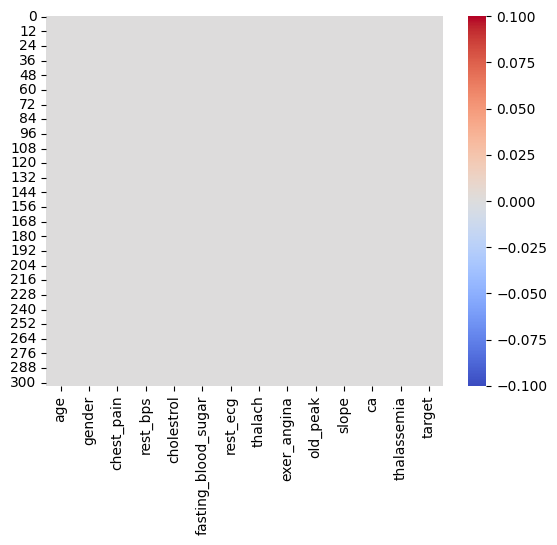

In [13]:
sns.heatmap(df.isna(),annot=False,cmap="coolwarm")

In [14]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
df.corr().style.background_gradient()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


   - I can notice that there is a slight correlation between chest pain and thalach(Maximum heart rate)

- 45 > agina pectorisi varudhu
-chest pain
- male is more vulnerable to chest pain compare to women

/tmp/ipykernel_18/3787379966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],norm_hist=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

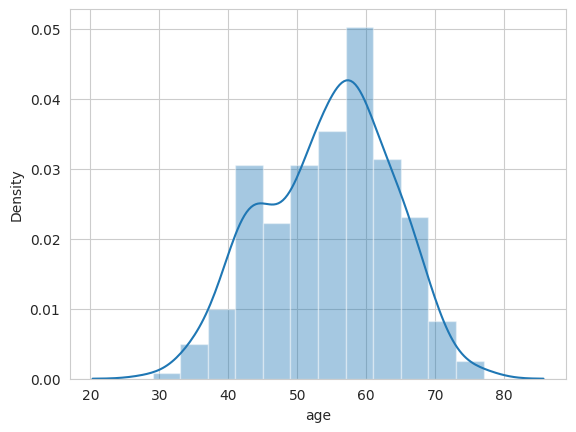

In [17]:
sns.set_style('whitegrid')
sns.distplot(df['age'],norm_hist=True)

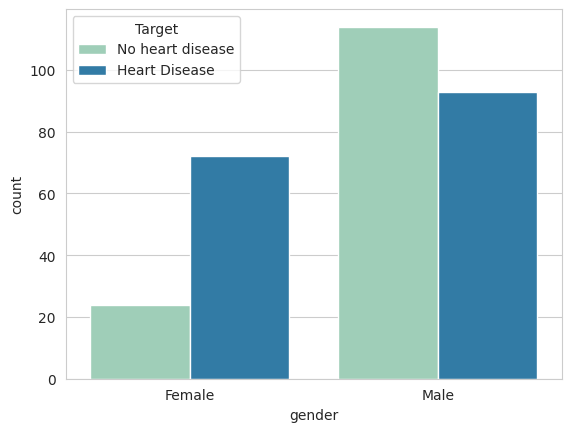

In [18]:
sns.countplot(x=df['gender'],hue=df['target'],palette='YlGnBu')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Target',labels=['No heart disease','Heart Disease'])
plt.show()

In [19]:
df[['gender','target']].value_counts()

gender  target
1       0         114
        1          93
0       1          72
        0          24
Name: count, dtype: int64

- 1 is considered as **"MALE"** here , 0 is considered as **'FEMALE'** here
- 207 male and 96 female patients in the dataset,Total **303** patient details in the dataset
- 93 male patient having heart diease and 72 female patient having heart disease
- 114 male patient and 24 female patient not having heart disease

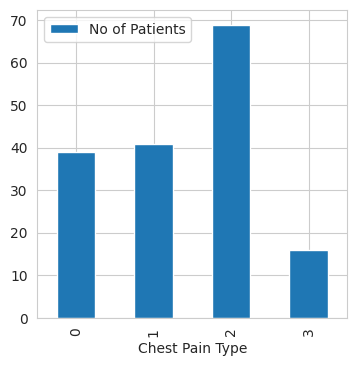

In [20]:
total_patient=[]
No_of_heartpain=[]
for i ,values in enumerate(df['chest_pain'].value_counts()):
    No_of_heartpain.append(i)
    total_patient.append(df[(df['chest_pain']==i)& (df['target']==1)]['chest_pain'].count())
    
chest_pain=pd.DataFrame({"Chest Pain Type": No_of_heartpain,"No of Patients": total_patient})
chest_pain.plot(x='Chest Pain Type', y='No of Patients', kind='bar', figsize=(4, 4))
plt.legend()

   - Here i can infered that 69 patient getting 2 time chest pain they having high risk of heart diease

* What is the distribution of age in the dataset?
* How does gender impact the target variable?
* What are the different types of chest pain recorded in the dataset?
* Is there a correlation between resting blood pressure (rest_bps) and age?
* What is the range of cholesterol levels (cholestrol) in the dataset?
* How many individuals have fasting blood sugar levels above a certain threshold?
* What are the different types of resting electrocardiographic results (rest_ecg)?
* Is there a relationship between maximum heart rate achieved (thalach) and age?
* How many individuals experience exercise-induced angina (exer_angina)?
* What is the distribution of ST depression induced by exercise relative to rest (old_peak)?
* How does the slope of the peak exercise ST segment (slope) vary across different individuals?
* What is the frequency of major vessels colored by fluoroscopy (ca)?
* What are the different types of thalassemia recorded in the dataset?
* What is the distribution of the target variable (presence of heart disease) in the dataset?

In [21]:
print(f" Cholestrol ranges between {df['cholestrol'].min()} - {df['cholestrol'].max()}")

 Cholestrol ranges between 126 - 564


In [22]:

data = {
    'Condition': ['Fasting blood sugar and heart disease', 'Fasting blood sugar and No heart disease',
                  'No Fasting blood sugar and heart disease', 'No Fasting blood sugar and No heart disease'],
    'Total Count': [df[(df["fasting_blood_sugar"]==1)& (df['target']==1)]['fasting_blood_sugar'].count(),
                    df[(df["fasting_blood_sugar"]==1)& (df['target']==0)]['fasting_blood_sugar'].count(),
                    df[(df["fasting_blood_sugar"]==0)& (df['target']==1)]['fasting_blood_sugar'].count(),
                    df[(df["fasting_blood_sugar"]==0)& (df['target']==0)]['fasting_blood_sugar'].count()]
}

blood_sugar_data = pd.DataFrame(data)
blood_sugar_data

,Condition,Total Count
0,Fasting blood sugar and heart disease,23
1,Fasting blood sugar and No heart disease,22
2,No Fasting blood sugar and heart disease,142
3,No Fasting blood sugar and No heart disease,116


<font size=4>
Among the individuals in the dataset, a slightly higher number of people without fasting blood sugar have heart disease compared to those with fasting blood sugar.
However, the majority of individuals with heart disease do not have fasting blood sugar, indicating that fasting  <b> blood sugar may not be a significant factor in the presence of heart disease </b> in this dataset.
    
<font>


In [23]:
for i in df['rest_ecg'].value_counts().index:
    print(i,":",df[(df['rest_ecg']==i) & (df['target']==1)]['target'].count())

1 : 96
0 : 68
2 : 1


 - 77 elderly people having high risk of heart diease 

<Axes: xlabel='chest_pain', ylabel='count'>

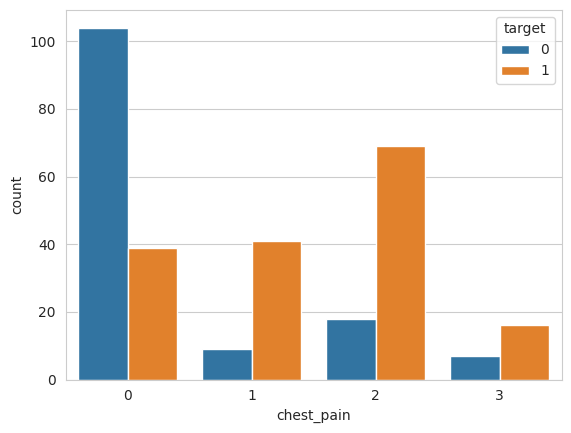

In [24]:
sns.countplot(x='chest_pain',hue='target',data=df)

In [25]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

- Here non-diabetic patient data is less than diabletic patient ,so i am going to use imblearn to do random over sampling technique to uincrease the data

## 5. Model Building

In [26]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [27]:
ros = RandomOverSampler(random_state=42)
X,y=ros.fit_resample(X,y)

In [28]:
X.shape

(330, 13)

In [29]:
training_score=[]
testing_score=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


def model_prediction(model):
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    a = accuracy_score(y_train,X_train_pred)*100
    b = accuracy_score(y_test,X_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    y_pred=model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    


## Logistic Regression

In [30]:
model_prediction(LogisticRegression())


r2_Score of LogisticRegression() model on Training Data is: 86.23481781376519
r2_Score of LogisticRegression() model on Testing Data is: 83.13253012048193
[[30  6]
 [ 8 39]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_prediction(DecisionTreeClassifier())

r2_Score of DecisionTreeClassifier() model on Training Data is: 100.0
r2_Score of DecisionTreeClassifier() model on Testing Data is: 73.49397590361446
[[28  8]
 [14 33]]


- My Decision tree model is **overfitting** ,training score is high and testing score is very low
- i am planning to use grid search cv to improve the result

## Decision Tree after Cross validation

In [32]:
param_grid={
    "max_depth":[3,4,5,6],
    "min_samples_leaf":[1,2,3],
    "max_leaf_nodes":[None,5,10,15]
}

In [33]:
grided_dc=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5)

In [34]:
model_prediction(DecisionTreeClassifier(max_depth= 6, max_leaf_nodes= None, min_samples_leaf= 1))

r2_Score of DecisionTreeClassifier(max_depth=6) model on Training Data is: 96.76113360323887
r2_Score of DecisionTreeClassifier(max_depth=6) model on Testing Data is: 73.49397590361446
[[29  7]
 [15 32]]


### Random Forest

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search CV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

In [36]:
model_prediction(grid_search_rf)

r2_Score of GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]}) model on Training Data is: 95.54655870445345
r2_Score of GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]}) model on Testing Data is: 79.51807228915662
[[29  7]
 [10 37]]


In [37]:
models=['LogisticRegression','DecisionTreeClassifier','DecisionTree_CV','Random_forest']
data={"models":models,"Training_score":training_score,"Testing_score":testing_score}
result=pd.DataFrame(data=data)
result['Diff']=result['Training_score']-result['Testing_score']
result

,models,Training_score,Testing_score,Diff
0,LogisticRegression,86.2,83.1,3.1
1,DecisionTreeClassifier,100.0,73.5,26.5
2,DecisionTree_CV,96.8,73.5,23.3
3,Random_forest,95.5,79.5,16.0


<Axes: xlabel='models'>

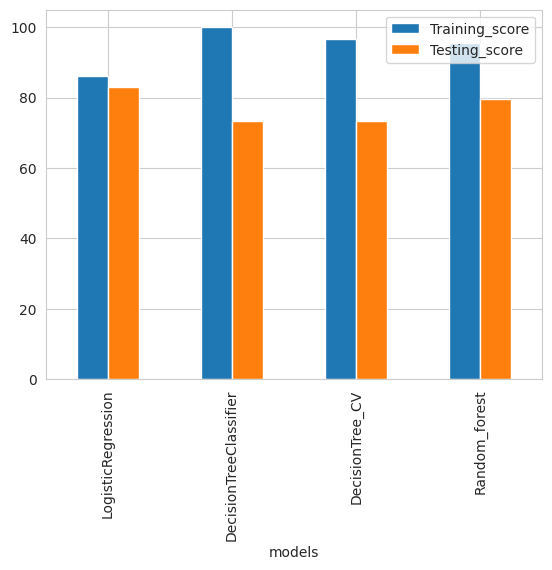

In [38]:
sns.set_style('whitegrid')
result.plot(x='models',y=['Training_score','Testing_score'],kind='bar')